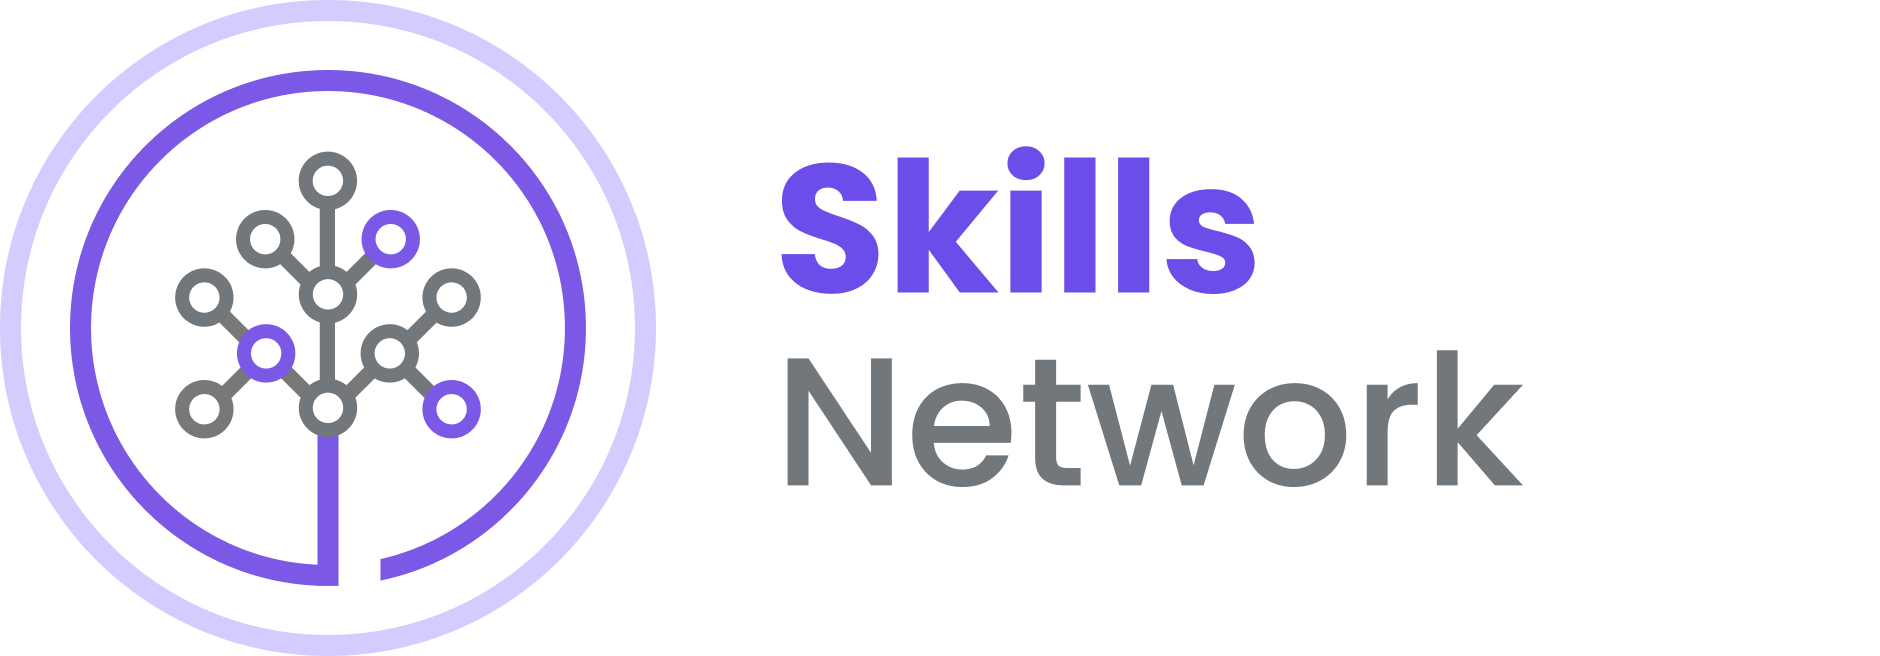

In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in
real-time.

This dashboard application contains input components such as a dropdown list and a range slider to
interact with a pie chart and a scatter point chart. You will be guided to build this dashboard application via the following tasks:

TASK 1: Add a Launch Site Drop-down Input Component

TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

TASK 3: Add a Range Slider to Select Payload

TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

Note:Please take screenshots of the Dashboard and save them. Further upload your notebook to github.

The github url and the screenshots are later required in the presentation slides.

Your completed dashboard application should look like the following screenshot:

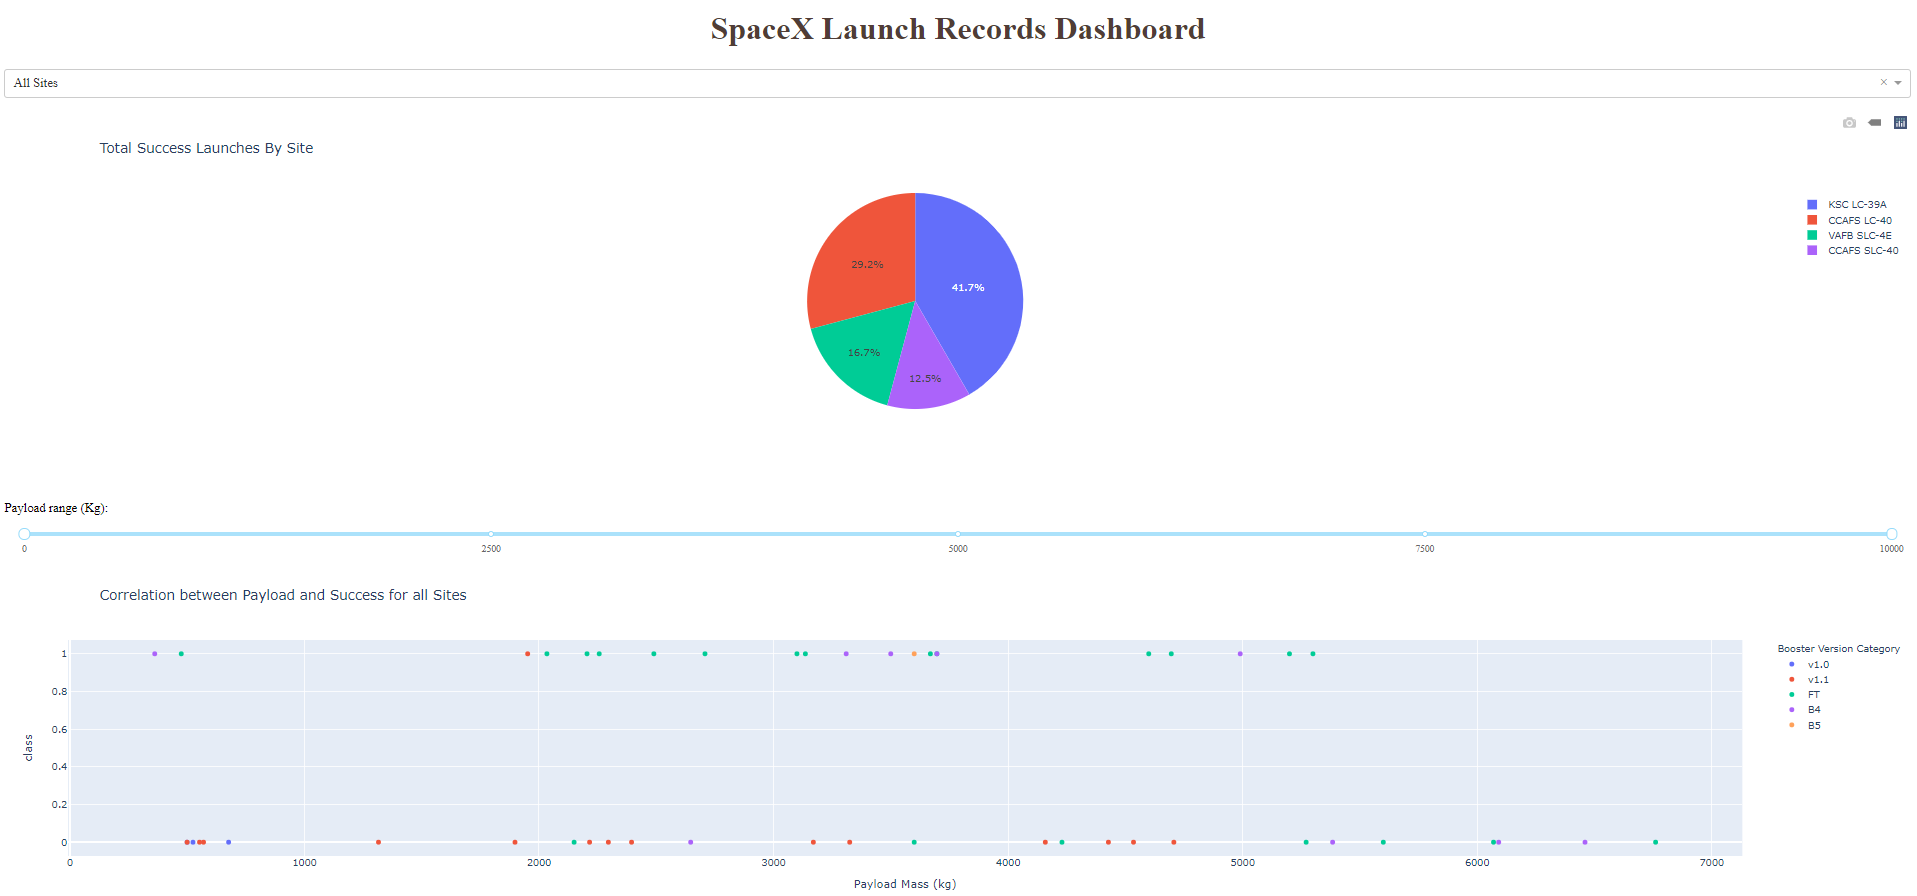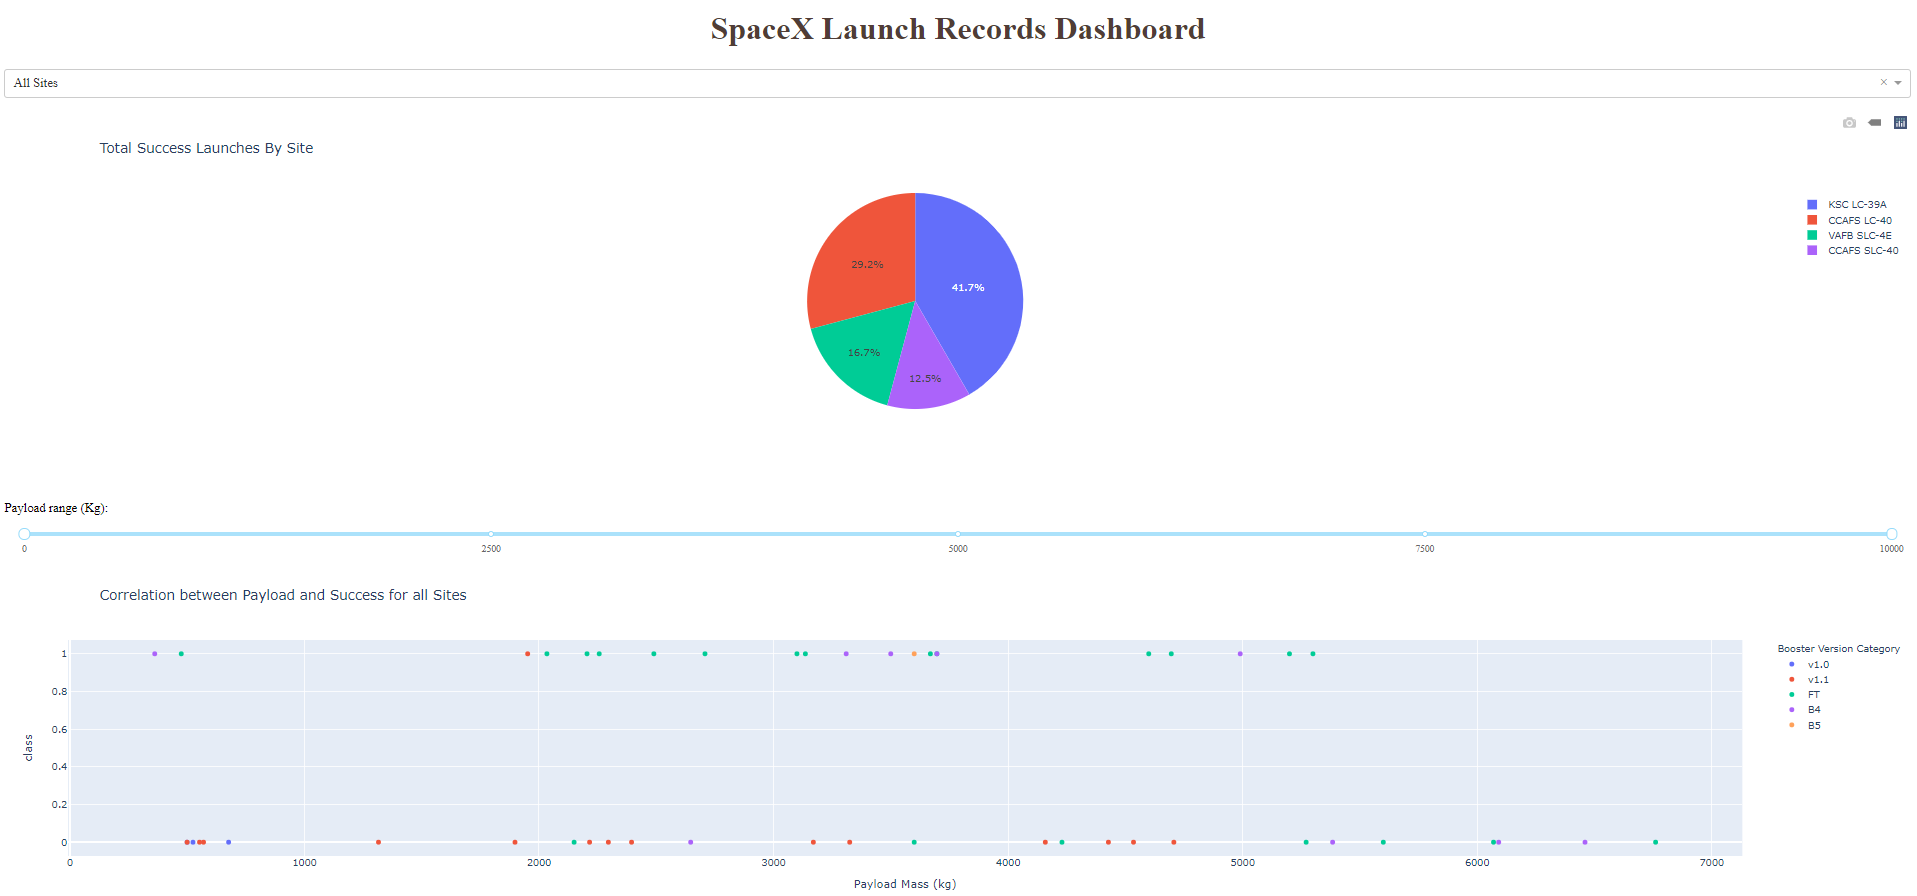

After visual analysis using the dashboard, you should be able to obtain some insights to answer the following five questions:

Which site has the largest successful launches?

Which site has the highest launch success rate?

Which payload range(s) has the highest launch success rate?

Which payload range(s) has the lowest launch success rate?

Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?

Estimated time needed: 90 minutes

Download a skeleton dashboard application and dataset

First, let’s get the SpaceX Launch dataset for this lab:

Run the following wget command line in the terminal to download dataset as spacex_launch_dash.csv

In [ ]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

Download a skeleton Dash app to be completed in this lab:

In [ ]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

Test the skeleton app by running the following command in the terminal:

In [ ]:
python3.11 spacex_dash_app.py

TASK 1: Add a Launch Site Drop-down Input Component

We have four different launch sites and we would like to first see which one has the largest success count. Then, we would like to select one specific site and check its detailed success rate (class=0 vs. class=1).

As such, we will need a dropdown menu to let us select different launch sites.

Find and complete a commented dcc.Dropdown(id='site-dropdown',...) input with following attributes:

id attribute with value site-dropdown

options attribute is a list of dict-like option objects (with label and value attributes). You can set the label and value all to be the launch site names in the spacex_df
and you need to include the default All option. e.g.,

In [ ]:
options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]

value attribute with default dropdown value to be ALL meaning all sites are selected

placeholder attribute to show a text description about this input area, such as Select a Launch Site here

searchable attribute to be True so we can enter keywords to search launch sites

Here is an example of dcc.Dropdown:

In [ ]:
  dcc.Dropdown(id='id',
                options=[
                    {'label': 'All Sites', 'value': 'ALL'},
                    {'label': 'site1', 'value': 'site1'},
                ],
                value='ALL',
                placeholder="place holder here",
                searchable=True
                ),

If you need more help about Dropdown(), refer to the Plotly Dash Reference section towards the end of this lab.

Your completed dropdown menu should look like the following screenshot:

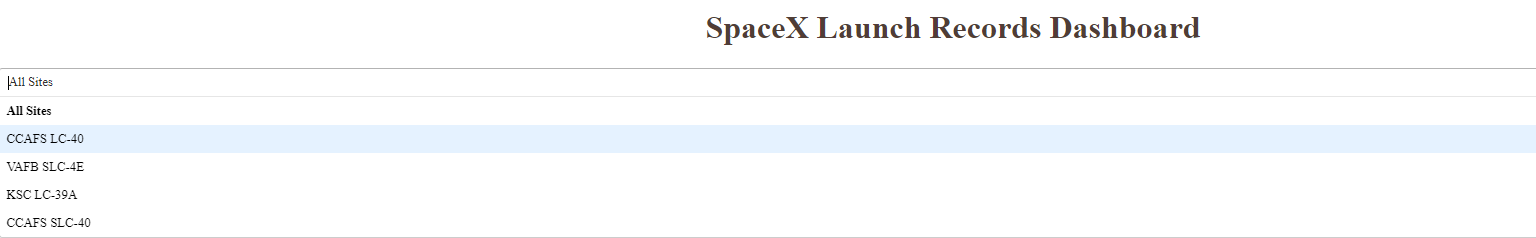

TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
The general idea of this callback function is to get the selected launch site from site-dropdown and render a pie chart visualizing launch success counts.

Dash callback function is a type of Python function which will be automatically called by Dash whenever receiving an input component updates, such as a click or dropdown selecting event.

If you need to refresh your memory about Plotly Dash callback functions, you may refer to the lab you have learned before:

Plotly Dash Lab

Let’s add a callback function in spacex_dash_app.py including the following application logic:

Input is set to be the site-dropdown dropdown, i.e., Input(component_id='site-dropdown', component_property='value')

Output to be the graph with id success-pie-chart, i.e., Output(component_id='success-pie-chart', component_property='figure')

A If-Else statement to check if ALL sites were selected or just a specific launch site was selected

If ALL sites are selected, we will use all rows in the dataframe spacex_df to render and return a pie chart graph to show the total success launches (i.e., the total count of class column)

If a specific launch site is selected, you need to filter the dataframe spacex_df first in order to include the only data for the selected site.

Then, render and return a pie chart graph to show the success (class=1) count and failed (class=0) count for the selected site.

Here is an example of a callback function:

In [ ]:
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(data, values='class', 
        names='pie chart names', 
        title='title')
        return fig
    else:
        # return the outcomes piechart for a selected site

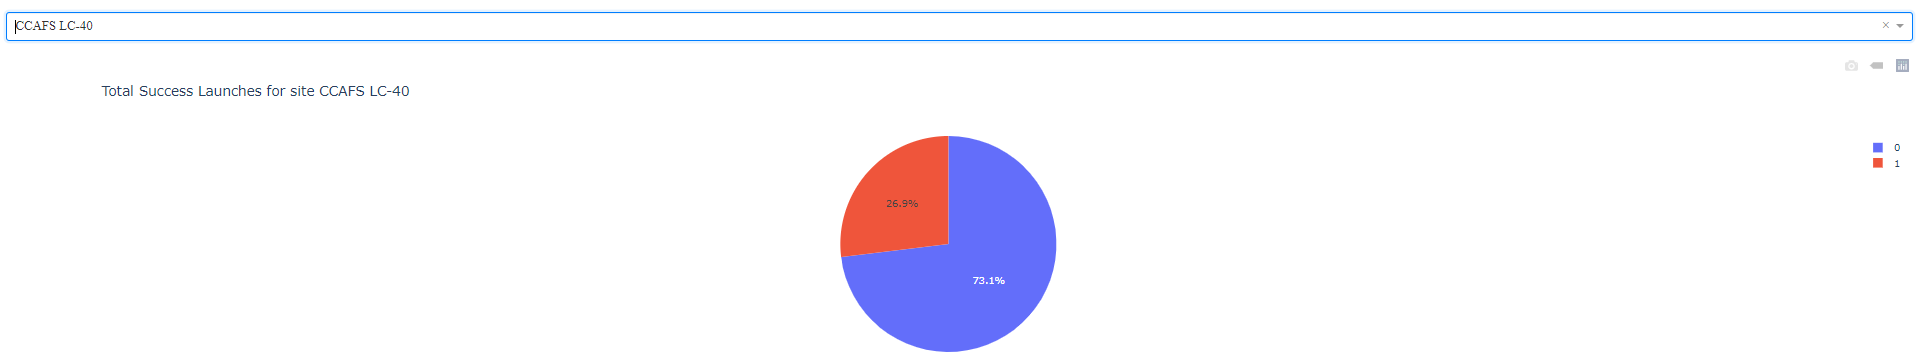

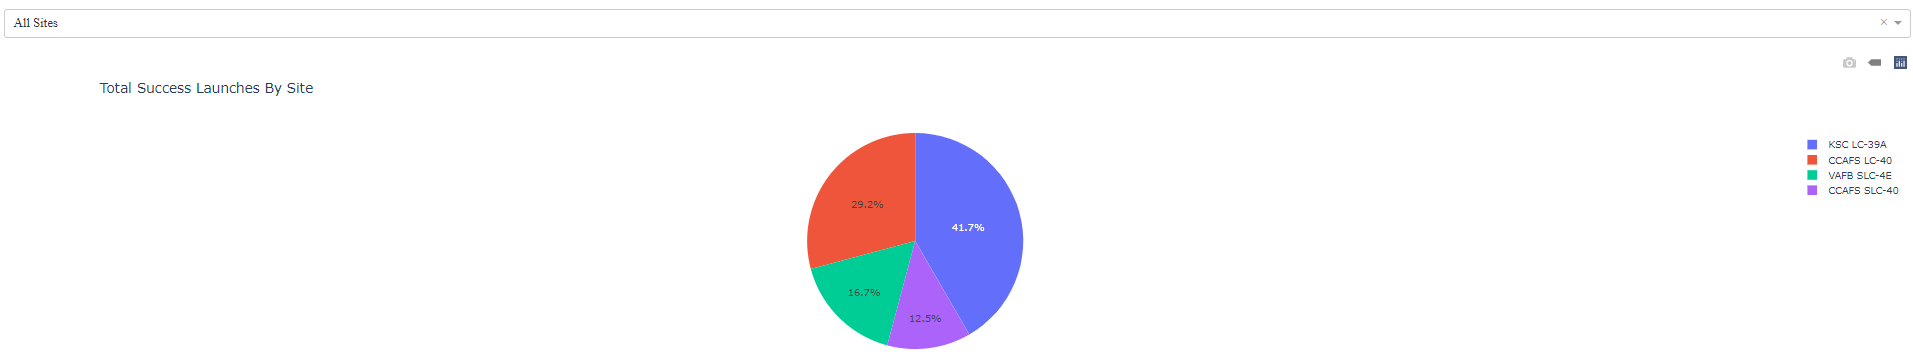

TASK 3: Add a Range Slider to Select Payload
Next, we want to find if variable payload is correlated to mission outcome. From a dashboard point of view, we want to be able to easily select different payload range and see if we can identify some visual patterns.

Find and complete a commented dcc.RangeSlider(id='payload-slider',...) input with the following attribute:

id to be payload-slider

min indicating the slider starting point, we set its value to be 0 (Kg)

max indicating the slider ending point to, we set its value to be 10000 (Kg)

step indicating the slider interval on the slider, we set its value to be 1000 (Kg)

value indicating the current selected range, we could set it to be min_payload and max_payload

Here is an example of RangeSlider:

In [ ]:
dcc.RangeSlider(id='id',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       100: '100'},
                value=[min_value, max_value])

TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

Next, we want to plot a scatter plot with the x axis to be the payload and the y axis to be the launch outcome (i.e., class column).

As such, we can visually observe how payload may be correlated with mission outcomes for selected site(s).

In addition, we want to color-label the Booster version on each scatter point so that we may observe mission outcomes with different boosters.

Now, let’s add a call function including the following application logic:

Input to be [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")]

Note that we have two input components, one to receive selected launch site and another to receive selected payload range

Output to be Output(component_id='success-payload-scatter-chart', component_property='figure')

A If-Else statement to check if ALL sites were selected or just a specific launch site was selected

If ALL sites are selected, render a scatter plot to display all values for variable Payload Mass (kg) and variable class.

In addition, the point color needs to be set to the booster version i.e., color="Booster Version Category"

If a specific launch site is selected, you need to filter the spacex_df first, and render a scatter chart to show values Payload Mass (kg) and class for the selected site, and color-label the point using Boosster Version Category likewise.

You rendered scatter point should look like the following screenshot:

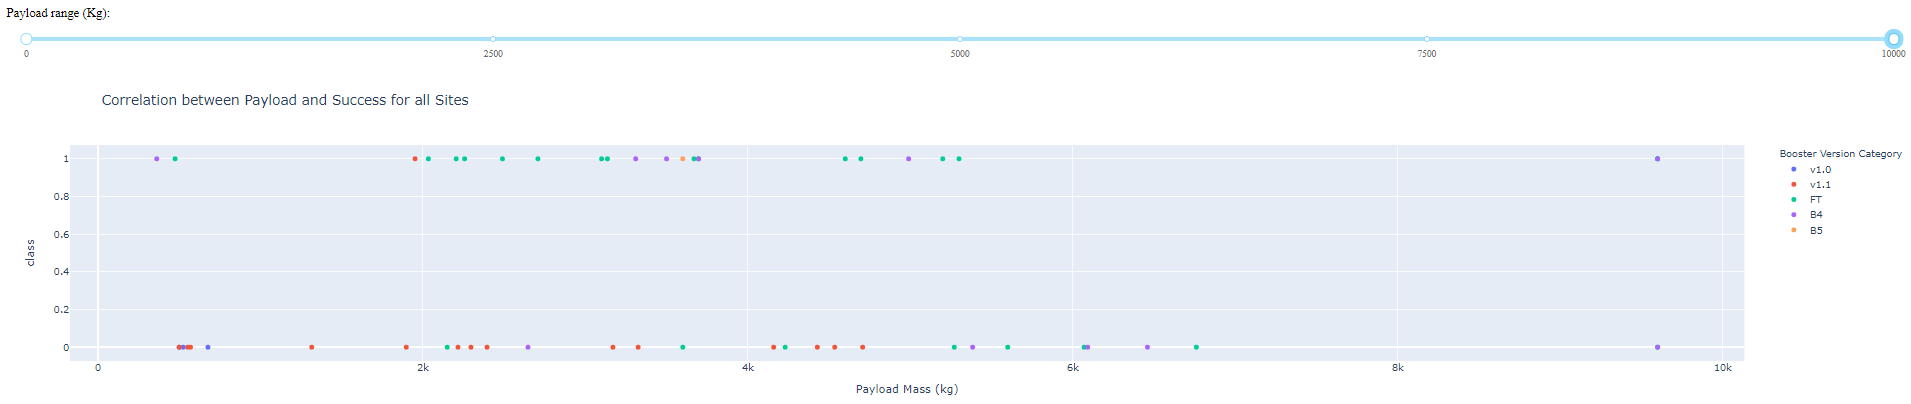

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Load the dataset
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("SpaceX Launch Records Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
    
    # Dropdown menu for selecting launch site
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'}] +
            [{'label': site, 'value': site} for site in spacex_df['Launch Site'].unique()],
        value='ALL',
        placeholder="Select a Launch Site",
        searchable=True
    ),
    html.Br(),

    # Pie chart for success rate
    html.Div(dcc.Graph(id='success-pie-chart')),
    html.Br(),

    # Payload range slider
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=100,
        marks={i: f'{i} Kg' for i in range(0, 10001, 2000)},
        value=[min_payload, max_payload]
    ),
    html.Br(),

    # Scatter plot for success-payload relationship
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# Callback for updating pie chart based on dropdown selection
@app.callback(
    Output('success-pie-chart', 'figure'),
    Input('site-dropdown', 'value')
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(
            spacex_df,
            names='Launch Site',
            values='class',
            title="Total Success Launches by Site"
        )
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        success_counts = filtered_df['class'].value_counts().reset_index()
        success_counts.columns = ['class', 'count']
        fig = px.pie(
            success_counts,
            names='class',
            values='count',
            title=f"Success vs Failure Launches for {selected_site}"
        )
    return fig

# Callback for updating scatter plot based on dropdown and slider input
@app.callback(
    Output('success-payload-scatter-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_chart(selected_site, payload_range):
    low, high = payload_range
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= low) &
                            (spacex_df['Payload Mass (kg)'] <= high)]
    if selected_site == 'ALL':
        fig = px.scatter(
            filtered_df,
            x='Payload Mass (kg)',
            y='class',
            color='Booster Version Category',
            title="Payload vs. Success for All Sites"
        )
    else:
        site_filtered_df = filtered_df[filtered_df['Launch Site'] == selected_site]
        fig = px.scatter(
            site_filtered_df,
            x='Payload Mass (kg)',
            y='class',
            color='Booster Version Category',
            title=f"Payload vs. Success for {selected_site}"
        )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
